<img src="https://vip.arizona.edu/images/logoviplab.png"/>

# <center> <font color='blue'>BE-BAT 485/585 -  Lab-7</font> </center>
## <center> <font color='blue'>*Danielle Tadych*</font> </center>
# <center> <font color='green'>EX-1</font> </center>
In this exercise you will learn and work with different data structures
1. BSQ
2. BIL
3. BIP



### Description
* BSQ = Band Sequential 
* BIL = Band-interleaved-by-line 
* BIP = Band-interleaved-by-pixel 
* We referring to 3D arrays as shown in this figure.<br>
<img src="https://www.mathworks.com/help/matlab/ref/fileio_l_pa.gif"/>

## <font color=red>Further Readings </font>
### If you wish to understand this topic in more detail please consult this great <a href="https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/bil-bip-and-bsq-raster-files.htm" target=new>reference by ESRI th emaker of ArcGIS</A>.


### <font color=blue>Always start with the Usual : load packages & modules needed by the program </font>

In [2]:
# load library modules 
import os
import numpy as np  # Notice that we always use numpy 
import matplotlib.pyplot as plt # Also matplotlib
import viplab_lib3 as vip # and of course our VIP custom library
%matplotlib inline



# load hdf5 relatd libraries & modules 

import h5py
# import osr
import copy 
import io    #IO
from PIL import Image  # another image module that we may use 

In [4]:
pip install osr

Note: you may need to restart the kernel to use updated packages.


In [5]:
import osr

ModuleNotFoundError: No module named 'osr'

In [7]:
conda list

# packages in environment at /Users/condongroup/opt/miniconda3/envs/remsens:
#
# Name                    Version                   Build  Channel
anyio                     3.5.0                    pypi_0    pypi
appnope                   0.1.2                    pypi_0    pypi
argon2-cffi               21.3.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
astropy                   5.0.1                    pypi_0    pypi
asttokens                 2.0.5                    pypi_0    pypi
attrs                     21.4.0                   pypi_0    pypi
babel                     2.9.1                    pypi_0    pypi
backcall                  0.2.0                    pypi_0    pypi
black                     22.1.0                   pypi_0    pypi
blas                      1.0                         mkl  
bleach                    4.1.0                    pypi_0    pypi
bokeh                     2.4.2                    pypi_0    pypi
bo

### <font color='blue'>*I've restarted the kernel countless times and also just closed everything and relaunched but still having issues.  I'm not sure what osr is for but hopefully it'll all work anyway<br> ~ DT*</font>

In [6]:
# This code forces plotting inline within the code (below the cell) and not outsoide in separate windows
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Here we will be using <font color=blue>a custom user defined functions for dealing with BIL & BIP files </font>

In [49]:
# Custom function to save BIL format file
def BIL_save(filename,data,datatype=np.int16):
    nrows,ncols,nbands=data.shape    
    #line=np.zeros((ncols),datatype)
    
    with open(filename, 'wb') as f:
      for r in range(nrows):
          for b in range(nbands):
              line=data[r,:,b]
              line=line.copy(order='C')
              f.write(line)
     
    f.close()
    #end of function

# Custom function to read BIL format file
def BIL_read(filename,nrows,ncols,nbands,datatype=np.int16):    
    dataCube=np.zeros((nrows,ncols,nbands),datatype)
    print("BIP reading... ",filename) 
    line=np.zeros((1,ncols),datatype)
    with open(filename, 'rb') as f:
      for r in range(nrows):
          for b in range(nbands):
              #read a line from file
              line=np.fromfile(f,dtype=datatype, count=ncols) 
              dataCube[r,:,b]=line
     
    f.close()
    return dataCube
    #end of function


# Custom function to save BIP format file
def BIP_save(filename,data,datatype=np.int16):
    nrows,ncols,nbands=data.shape    
    print("BIP saving... ",filename)
    # Complete the code
    
    with open(filename, 'wb') as f:
        for r in range(nrows):
            for c in range(ncols):
                for b in range(nbands):
                    pixel=data[r,c,b]
                    pixel=pixel.copy(order='C')
                    f.write(pixel)
     
    f.close()
    #end of function

# Custom function to read BIP format file
def BIP_read(filename,nrows,ncols,nbands,datatype=np.int16):    
    dataCube=np.zeros((nrows,ncols,nbands),datatype)
    print("BIP reading... ",filename)
    with open(filename, 'rb') as f:
      for r in range(nrows):
          for c in range(ncols):
              for b in range(nbands):
                 #read pixel by pixel
                 pixel=np.fromfile(f,dtype=datatype, count=1) 
                 dataCube[r,c,b]=pixel
     
    f.close()
    return dataCube
    #end of function

## Load NEON-AOP hdf5 files 

In [15]:
# Set file name and location
hdf5_file = '../Lab6/NEON_D14_SRER_DP3_502000_3523000_reflectance.h5'
hdf5_file1 = '../Lab6/NEON_D09_WOOD_DP3_476000_5221000_reflectance.h5'

# Open the file as hdf5 and create a file handle [hdf5]
hdf5= h5py.File(hdf5_file, "r")
hdf51= h5py.File(hdf5_file1, "r")

## Inspect the file contents 

In [16]:
#list_dataset lists the names of datasets in an hdf5 file
def list_dataset(name, node):
    if isinstance(node, h5py.Dataset):
        print(name)

hdf5.visititems(list_dataset)

#ls_dataset displays the name, shape, and type of datasets in hdf5 file
def ls_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(node)

# Use the visititems methods to learn abotu the data 
hdf5.visititems(ls_dataset)

# Look at the the last line printed, that is the data we will work with 

SRER/Reflectance/Metadata/Ancillary_Imagery/Aerosol_Optical_Depth
SRER/Reflectance/Metadata/Ancillary_Imagery/Aspect
SRER/Reflectance/Metadata/Ancillary_Imagery/Cast_Shadow
SRER/Reflectance/Metadata/Ancillary_Imagery/Dark_Dense_Vegetation_Classification
SRER/Reflectance/Metadata/Ancillary_Imagery/Data_Selection_Index
SRER/Reflectance/Metadata/Ancillary_Imagery/Haze_Cloud_Water_Map
SRER/Reflectance/Metadata/Ancillary_Imagery/Illumination_Factor
SRER/Reflectance/Metadata/Ancillary_Imagery/Path_Length
SRER/Reflectance/Metadata/Ancillary_Imagery/Sky_View_Factor
SRER/Reflectance/Metadata/Ancillary_Imagery/Slope
SRER/Reflectance/Metadata/Ancillary_Imagery/Smooth_Surface_Elevation
SRER/Reflectance/Metadata/Ancillary_Imagery/Visibility_Index_Map
SRER/Reflectance/Metadata/Ancillary_Imagery/Water_Vapor_Column
SRER/Reflectance/Metadata/Ancillary_Imagery/Weather_Quality_Indicator
SRER/Reflectance/Metadata/Coordinate_System/Coordinate_System_String
SRER/Reflectance/Metadata/Coordinate_System/EPSG C

## Load the reflectance data 

In [18]:
# Point to the surface reflectance data in this HDF 5 file 
# If you use a different NEON-AOP file make sure you use the correct name
surf_refl = hdf5['SRER']['Reflectance']

reflArray = surf_refl['Reflectance_Data']
print(reflArray)
## Notice the data dimension and shape

surf_refl1 = hdf51['WOOD']['Reflectance']
print(surf_refl1)

refl_shape = reflArray.shape
print(' Reflectance Data Dimensions:',refl_shape)

<HDF5 dataset "Reflectance_Data": shape (1000, 1000, 426), type "<i2">
<HDF5 group "/WOOD/Reflectance" (2 members)>
 Reflectance Data Dimensions: (1000, 1000, 426)


## Load some metadata about the file/image

In [19]:
mapInfo = surf_refl['Metadata']['Coordinate_System']['Map_Info']
print('Data Cube Map Info:',mapInfo[()])
#First convert mapInfo to a string
mapInfo_string = str(mapInfo[()]) #convert to string
#split the strings using the separator comma "," 
mapInfo_split = mapInfo_string.split(",") 
print(mapInfo_split)
#Extract the upper left-hand corner coordinates from mapInfo
xMin = float(mapInfo_split[3]) 
yMax = float(mapInfo_split[4])

#Extract the resolution & convert to floating decimal number
res = float(mapInfo_split[5]),float(mapInfo_split[6])
#print('Resolution:',res)  # IF you want to print it

#Calculate the xMax and yMin values from the dimensions using the array size and pixel size 
xMax = xMin + (refl_shape[1]*res[0]) #xMax = left edge + (# of columns * x pixel resolution)
yMin = yMax - (refl_shape[0]*res[1]) #yMin = top edge - (# of rows * y pixel resolution)

#Define extent as a tuple:
cube_ext = (xMin, xMax, yMin, yMax)
print('cube_ext:',cube_ext)
print('cube_ext type:',type(cube_ext))

Data Cube Map Info: b'UTM,  1.000,  1.000,       502000.00,       3524000.0,       1.0000000,       1.0000000,  12,  North,  WGS-84,  units=Meters, 0'
["b'UTM", '  1.000', '  1.000', '       502000.00', '       3524000.0', '       1.0000000', '       1.0000000', '  12', '  North', '  WGS-84', '  units=Meters', " 0'"]
cube_ext: (502000.0, 503000.0, 3523000.0, 3524000.0)
cube_ext type: <class 'tuple'>


## Load the list fo wavelengths 

In [20]:
#define the wavelengths variable
wavelengths = surf_refl['Metadata']['Spectral_Data']['Wavelength']

#View wavelength information and values
print('wavelengths:',wavelengths)

wavelengths: <HDF5 dataset "Wavelength": shape (426,), type "<f4">


In [21]:
mapInfo = surf_refl['Metadata']['Coordinate_System']['Map_Info']
print('Data Cube Map Info:',mapInfo[()])

Data Cube Map Info: b'UTM,  1.000,  1.000,       502000.00,       3524000.0,       1.0000000,       1.0000000,  12,  North,  WGS-84,  units=Meters, 0'


In [22]:
#Define extent as a tuple:
cube_ext = (xMin, xMax, yMin, yMax)
print('cube_ext:',cube_ext)
print('cube_ext type:',type(cube_ext))

cube_ext: (502000.0, 503000.0, 3523000.0, 3524000.0)
cube_ext type: <class 'tuple'>


## Display Image with Map coordinaets  

Creating RGB Image...


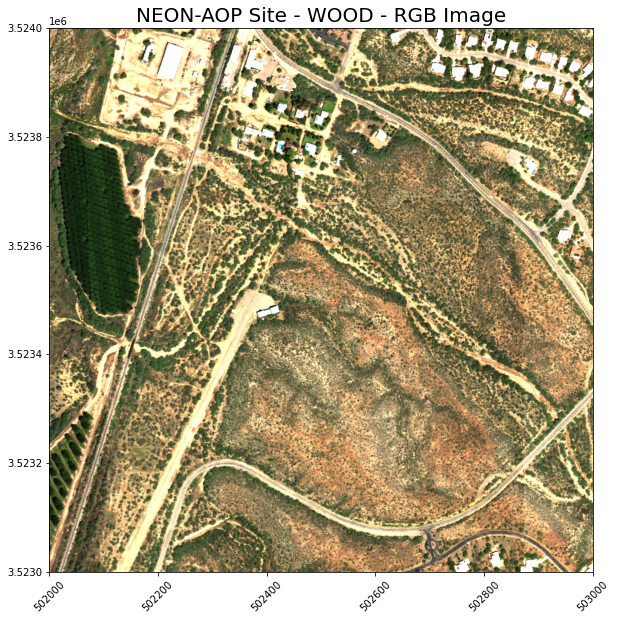

In [23]:
# assign some bands to index so you can easily remember them
bandRED=48
bandGREEN=34
bandBLUE=17
bandNIR=97

# Combine the Red, Green and Blue data into an RGB image for display
print("Creating RGB Image...")
RGBImage=vip.Image_getRGB(reflArray[:,:,bandRED],reflArray[:,:,bandGREEN],reflArray[:,:,bandBLUE],5000)

# Display RGB True color Image
plt.figure(figsize=(10,10))
plt.title('NEON-AOP Site - WOOD - RGB Image', fontsize=20); 
plt.xticks(rotation = 45)

plt.imshow(RGBImage,extent=cube_ext)


### <font color=blue>Load the data  </font> - In case we use a  binary BSQ file 

### <font color=blue>Assign the HDF5 bands to a DataCube so we can use it </font>

In [24]:
refl_shape = reflArray.shape
print(' Reflectance Data Dimensions:',refl_shape)

 Reflectance Data Dimensions: (1000, 1000, 426)


In [25]:
nrows,ncols=refl_shape[0],refl_shape[1]

Creating RGB Image...


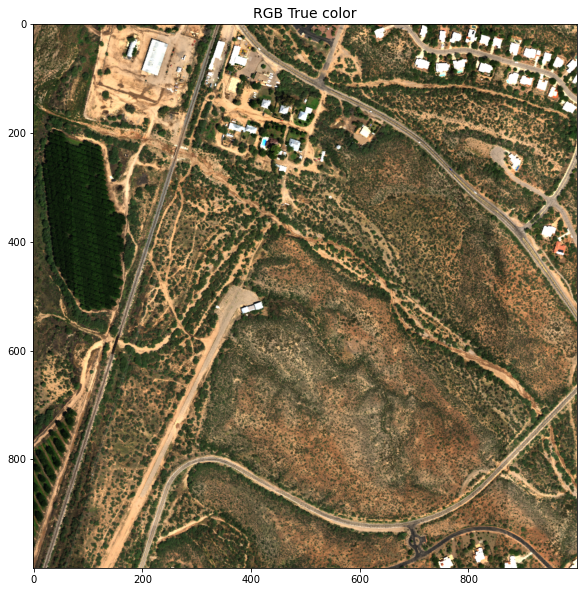

In [26]:
# Create a 3D empty Array and fill it with ZEROs

DataCube=np.zeros((refl_shape[0],refl_shape[1],4),np.int16)
# Copy 4 bands from the HDf5 file to this new Cube
# datatype=np.int16

DataCube[:,:,0]= np.int16(reflArray[:,:,bandRED])
DataCube[:,:,1]= np.int16(reflArray[:,:,bandGREEN])
DataCube[:,:,2]= np.int16(reflArray[:,:,bandBLUE])
DataCube[:,:,3]= np.int16(reflArray[:,:,bandNIR])

# Combine the Red, Green and Blue data into an RGB model for display
print("Creating RGB Image...")
RGBImage=vip.Image_getRGB(DataCube[:,:,0],DataCube[:,:,1],DataCube[:,:,2],7000)

# Display RGB True color Image
plt.figure(figsize=(20,10))
plt.title('RGB True color',fontsize=14)
plt.imshow(RGBImage)

### <font color=blue>Load a BIL File</font>

In [27]:
# Save data in a BIL format using the VIP library 
BILfile='WOOD_NEON_AOP_Image.bil' # Define file name 
BIL_save(BILfile,DataCube);

### <font color=blue>Display this BIL file back</font>

BIP reading...  WOOD_NEON_AOP_Image.bil
time: 0.24  seconds


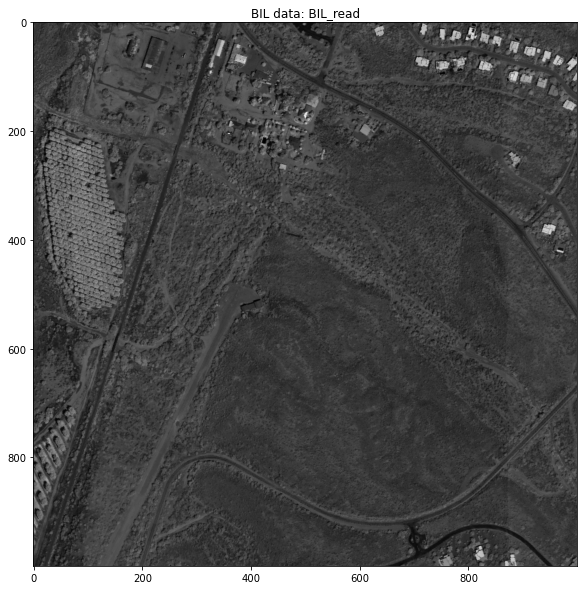

In [28]:
# To check that the data can be read correctly
#Read data from a BIL file
stime=vip.startTime()
DataCubeBIL=BIL_read(BILfile,nrows,ncols,4)
vip.endTime(stime,'time:')
#display as gray
plt.figure(figsize=(20,10))
plt.title('BIL data: BIL_read')
plt.imshow(DataCubeBIL[:,:,3],cmap='gray')

### <font color=blue>What happens if the BIL file is read as BSQ</font>

nbands= 4


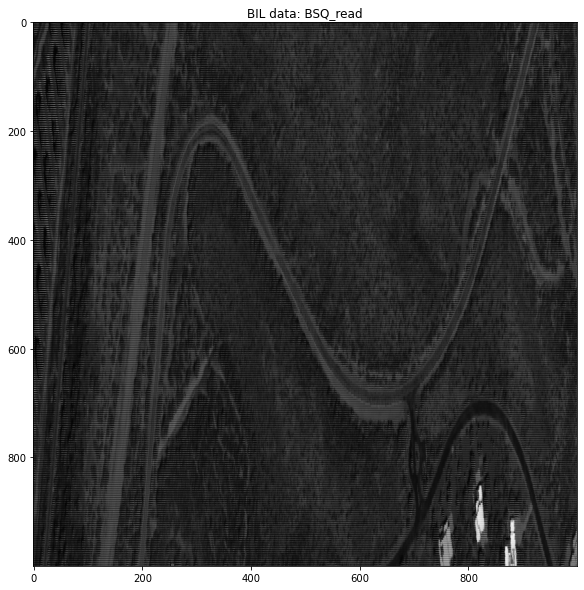

In [29]:
#To 'see' how the data is written in the file, use the BSQ read function
#to load the data back as stored in the file
DataCubeBIL2=vip.BSQ_band_read(BILfile,[0,1,2,3],nrows,ncols)

#Display it
plt.figure(figsize=(20,10))
plt.title('BIL data: BSQ_read')
plt.imshow(DataCubeBIL2[:,:,3],cmap='gray')

## You will need to design a function that saves data in a BIP format 

In [41]:
# Save data as BIP format
BIPfile='WOOD_NEON_AOP_Image1.bip'
# Save DataCube as a BIP file format..You will need to redesign this function yourself 
BIP_save(BIPfile,DataCube); # the code is above consult BIP_read function ot see how it works 

BIP saving...  WOOD_NEON_AOP_Image1.bip


In [43]:
#Read data from BIP file
stime=vip.startTime()
DataCubeBIP=BIP_read(BIPfile,nrows,ncols,4)
vip.endTime(stime,'time:')

BIP reading...  WOOD_NEON_AOP_Image1.bip
time: 2.0  min  27.435281276702874  sec


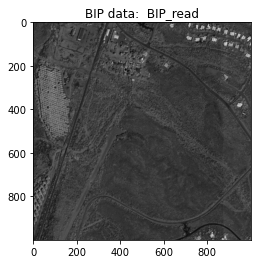

In [44]:
#display as gray
plt.figure()
plt.title('BIP data:  BIP_read')
plt.imshow(DataCubeBIP[:,:,3],cmap='gray')

In [45]:
print("BSQ reading")
DataCubeBIP2=vip.BSQ_band_read(BIPfile,[0,1,2,3],nrows,ncols)
vip.endTime(stime,'time:')

BSQ reading
nbands= 4
time: 4.0  min  30.4685072898865  sec


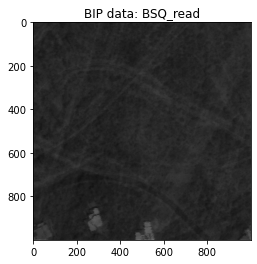

In [46]:
#display as gray
plt.figure()
plt.title('BIP data: BSQ_read')
plt.imshow(DataCubeBIP2[:,:,3],cmap='gray')

# <font color="red">To do: Check presentation</font>
### Write a function to save a 2D array as BIP file format
### Test it by reading back the file using the BIP_read function.
### It should display correctly, did it?

nbands= 426
Creating RGB Image...


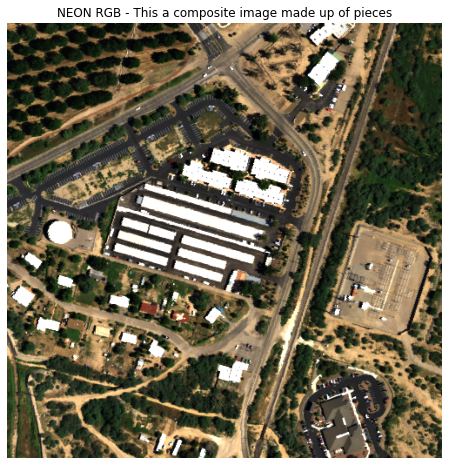

In [48]:
#Load NEON Dataset    
filename="NEON_GreenValley.bsq"
nrows=500
ncols=500
nbands = 426
datatype=np.int16
# Read the wavelength values from the textfile
file = open('NEON_wavelength_values.txt', 'r') 
Xvalues= file.readlines() 
nvalues=len(Xvalues)
#convert text to number (float)
for i in range(0,nvalues):
  Xvalues[i]=float(Xvalues[i]) 

# assign some bands with an index to easy remember them
bandRED=53
bandGREEN=37
bandBLUE=18
bandNIR=98
bandSWIR1=246
bandSWIR2=340

# Read all bands into a single DataCube
DataCube=vip.BSQ_band_read(filename,-426,nrows,ncols)

# Combine the Red, Green and Blue data into an RGB model for display
print("Creating RGB Image...")

# Extract some bands from the cube
DataRED=DataCube[:,:,bandRED]
DataGREEN=DataCube[:,:,bandGREEN]
DataBLUE=DataCube[:,:,bandBLUE]
DataNIR=DataCube[:,:,bandNIR]

# Display RGB Image
RGBImage=vip.Image_getRGB(DataRED,DataGREEN,DataBLUE,8000)
# Display RGB True color Image
plt.figure(figsize=(8,8))
plt.axis('off')

plt.title("NEON RGB - This a composite image made up of pieces")
plt.imshow(RGBImage)

In [60]:
# Custom function to save BIP format file
def BIP_save2D(filename,data,datatype=np.int16):
    nrows,ncols=data.shape    
    print("BIP saving... ",filename)
    # Complete the code
    
    with open(filename, 'wb') as f:
        for r in range(nrows):
            for c in range(ncols):
                pixel=data[r,c]
                pixel=pixel.copy(order='C')
                f.write(pixel)
     
    f.close()
    #end of function

In [54]:
# Now to try to save the NIR as a 2D file

Name = 'NEON_GreenValley_NIR.bsq'

BIP_save2D(Name, DataNIR)

BIP saving...  NEON_GreenValley_NIR.bsq


In [55]:
#Read data from BIP file
stime=vip.startTime()
NIR_bsq = BIP_read(Name,nrows,ncols,1)
vip.endTime(stime,'time:')

BIP reading...  NEON_GreenValley_NIR.bsq
time: 7.12  seconds


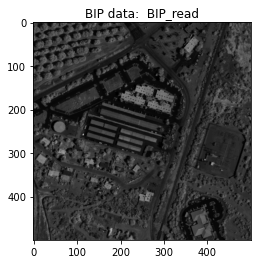

In [59]:
#display as gray
plt.figure()
plt.title('BIP data:  BIP_read')
plt.imshow(NIR_bsq,cmap='gray')

# <center> <font color='green'>EX-2</font> </center>
In this exercise you will learn and understand to:<br>
1. Compress and decompress a matrix image using simple RLE algorithms
<img src="../Data/Lab_7/Data/RLE-Compress.jpg" />

In [61]:
#input data    
filename="Lab7_Ex2Data.bsq"
nrows=16
ncols=16
nbands=1
datatype=np.int16

# Read Data from file (single layer)
print("Reading BSQ ",filename)
Data=vip.BSQ_band_read(filename,0,nrows,ncols) 

Reading BSQ  Lab7_Ex2Data.bsq


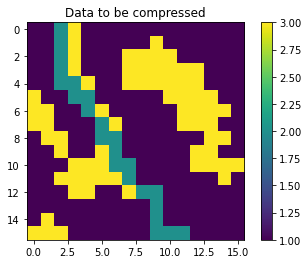

In [62]:
plt.figure()
plt.title('Data to be compressed')
plt.imshow(Data)
plt.colorbar()

In [249]:
#Initalize Array to -1
NumRowRLEs=16
NumColsRLE=32
# Why 32?
NumRows=16
NumCols=16
DataRLE=np.full((NumRowRLEs,NumColsRLE),-10)

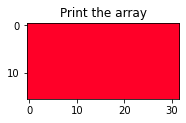

In [210]:
plt.subplot(122)
plt.title('Print the array')
plt.imshow(DataRLE, cmap=cmap)
#plt.colorbar()

## Example RLE compression function 

In [211]:
for iRow in range(NumRows):
    CurrVal=Data[iRow,0]
    iColRLE=0
    DataRLE[iRow,0]=CurrVal
    NumRLE=0
    for iCol in range(NumCols):
        # print(iCol)
        if(Data[iRow,iCol] == CurrVal):
            NumRLE=NumRLE+1
        else:
            DataRLE[iRow,iColRLE] = CurrVal
            CurrVal=Data[iRow,iCol]
            iColRLE=iColRLE+1
            DataRLE[iRow,iColRLE]=NumRLE
            iColRLE=iColRLE+1
            NumRLE=0
        if (iCol==16):
            DataRLE[iRow,iColRLE] = CurrVal
            iColRLE=iColRLE+1
            DataRLE[iRow,iColRLE]=NumRLE

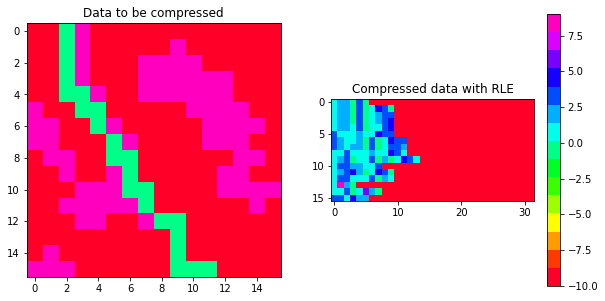

In [212]:
# get discrete colormap
#n_clusters = 5
#cmap = plt.get_cmap('viridis', n_clusters)
cmap = plt.get_cmap('gist_rainbow', 15)

plt.figure(figsize=(10,5))
# linear
plt.subplot(121)
plt.title('Data to be compressed')
plt.imshow(Data, cmap=cmap)
#plt.colorbar()

# log
plt.subplot(122)
plt.title('Compressed data with RLE')
plt.imshow(DataRLE, cmap=cmap)
plt.colorbar()

In [213]:
DataRLE

array([[  1,   2,   2,   0,   3,   0, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10],
       [  1,   2,   2,   0,   3,   0,   1,   4,   3,   0, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10],
       [  1,   2,   2,   0,   3,   0,   1,   2,   3,   3, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10],
       [  1,   2,   2,   0,   3,   0,   1,   2,   3,   5, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10],
       [  1,   2,   2,   1,   3,   0,   1,   1,   3,   5, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10],
       [  3,   1,   1,   1,   2,   1,   1,   4,   3,   3, -10, -10, -10,
  

#To do: Check presentation homework section
## <font color=red>Here is your chance to be creative. And do not worry...Just try</font>
* Can you design a compression algorithm or modify this RLE approach in this exercise ?
* Write code using your proposed compression algorithm to Write Data and Read it back ?

In [291]:
#Initalize Array to -1
NumRowRLEs=16
NumColsRLE=32
# Why 32?
NumRows=16
NumCols=16
DataRLE2=np.full((NumRowRLEs,NumColsRLE),-10)

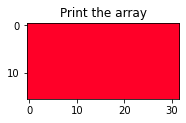

In [292]:
plt.subplot(122)
plt.title('Print the array')
plt.imshow(DataRLE2, cmap=cmap)
#plt.colorbar()

In [293]:
for iRow in range(NumRows):
    CurrVal=Data[iRow,0]
    # print(CurrVal)
    iColRLE=0
    DataRLE2[iRow,0]=CurrVal
    NumRLE=0
    for iCol in range(NumCols):
        # print(iCol)
        if(Data[iRow,iCol] == CurrVal):
            NumRLE=NumRLE+1
        # elif (iCol==16):
        #     DataRLE2[iRow,iColRLE] = CurrVal
        #     iColRLE=iColRLE+1
        #     DataRLE2[iRow,iColRLE]=NumRLE
        # elif (Data[iRow,iCol] == 1):
        #     NumRLE = NumRLE - 1
        #     NumRLE=0
        else:
            DataRLE2[iRow,iColRLE] = CurrVal
            CurrVal=Data[iRow,iCol]
            iColRLE=iColRLE+1
            DataRLE2[iRow,iColRLE]=NumRLE+1
            # print(DataRLE2[iRow,iColRLE])
            iColRLE=iColRLE+1
            NumRLE=0

DataRLE2[:,1] = DataRLE2[:,1]-1

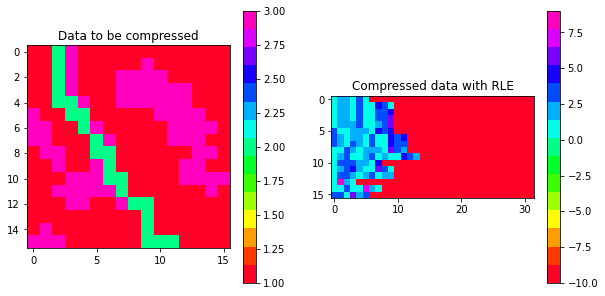

In [294]:
# get discrete colormap
#n_clusters = 5
#cmap = plt.get_cmap('viridis', n_clusters)
cmap = plt.get_cmap('gist_rainbow', 15)

plt.figure(figsize=(10,5))
# linear
plt.subplot(121)
plt.title('Data to be compressed')
plt.imshow(Data, cmap=cmap)
plt.colorbar()

# log
plt.subplot(122)
plt.title('Compressed data with RLE')
plt.imshow(DataRLE2, cmap=cmap)
plt.colorbar()

In [295]:
DataRLE2

array([[  1,   2,   2,   1,   3,   1, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10],
       [  1,   2,   2,   1,   3,   1,   1,   5,   3,   1, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10],
       [  1,   2,   2,   1,   3,   1,   1,   3,   3,   4, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10],
       [  1,   2,   2,   1,   3,   1,   1,   3,   3,   6, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10],
       [  1,   2,   2,   2,   3,   1,   1,   2,   3,   6, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10],
       [  3,   1,   1,   2,   2,   2,   1,   5,   3,   4, -10, -10, -10,
  

In [296]:
print("End of Program")

End of Program


### <font color='blue'>*So basically the main modification was that the original algorithm code  wasn't properly counting the data columns after the first one so I fixed that.  But then the algorithm was overcounting the first data column by 1 and I couldn't figure out how to only fix that so I just subtracted the first counting column by 1.  I hope that all makes sense.<br> ~ DT*</font>